In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
usecols = ['room_type', 'neighbourhood_group', 'latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

data = pd.read_csv('Data/AB_NYC_2019.csv', usecols=usecols)

In [3]:
data.shape

(48895, 10)

In [4]:
data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [5]:
data.dtypes

neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
data.isnull().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

## Question 1

In [8]:
# data.describe(include=[np.object])
data.describe(include=["O"])

,neighbourhood_group,room_type
count,48895,48895
unique,5,3
top,Manhattan,Entire home/apt
freq,21661,25409


In [9]:
# data['neighbourhood_group'].describe()
data['neighbourhood_group'].mode()

0    Manhattan
dtype: object

## Question 2

In [10]:
data_numeric = data.copy()
data_numeric = data_numeric.drop(['neighbourhood_group','room_type'], axis=1)

In [11]:
data_numeric.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


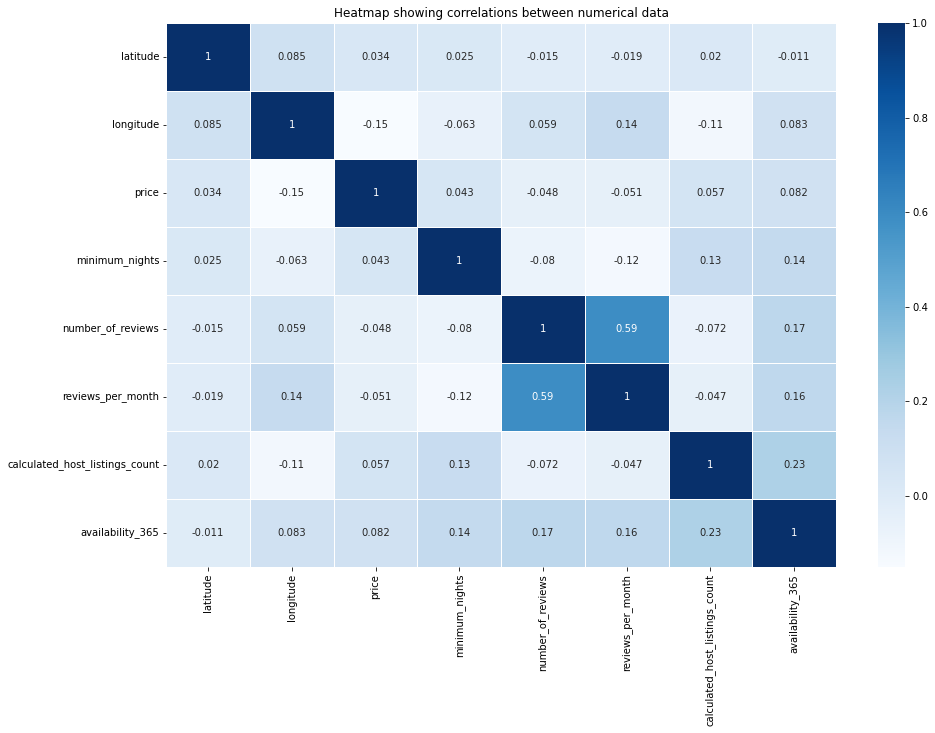

In [12]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [15]:
# show whole output
pd.set_option('display.max_rows', 500)

In [16]:
print(data_numeric.corr().unstack().sort_values(ascending = False))

latitude                        latitude                          1.000000
longitude                       longitude                         1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
reviews_per_month               reviews_per_month                 1.000000
number_of_reviews               number_of_reviews                 1.000000
minimum_nights                  minimum_nights                    1.000000
price                           price                             1.000000
availability_365                availability_365                  1.000000
reviews_per_month               number_of_reviews                 0.589407
number_of_reviews               reviews_per_month                 0.589407
availability_365                calculated_host_listings_count    0.225701
calculated_host_listings_count  availability_365                  0.225701
number_of_reviews               availability_365                  0.172028
availability_365         

## Question 3

In [36]:
data_class = data.copy()
mean = data_class['price'].mean()

data_class['above_average'] = np.where(data_class['price']>=mean,1,0)

In [37]:
data_class.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0


In [38]:
data_class = data_class.drop('price', axis=1)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)

In [41]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [42]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [43]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

#### Mutual information

In [44]:
from sklearn.metrics import mutual_info_score

In [45]:
cat = ['neighbourhood_group', 'room_type']

In [47]:
def calculate_mi(series):
    return round(mutual_info_score(series, df_train.above_average), 2)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
room_type,0.14
neighbourhood_group,0.05


In [48]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

## Question 4

In [49]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
num = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [57]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

DictVectorizer(sparse=False)

In [56]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [59]:
val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [60]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.79


## Question 5

In [62]:
features = cat + num

In [63]:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

DictVectorizer(sparse=False)

LogisticRegression(random_state=42)

neighbourhood_group 0.03992330504141528 0.7500766949585848


DictVectorizer(sparse=False)

LogisticRegression(random_state=42)

room_type 0.07591880560384501 0.714081194396155


DictVectorizer(sparse=False)

LogisticRegression(random_state=42)

latitude 0.0040300644237653005 0.7859699355762347


DictVectorizer(sparse=False)

LogisticRegression(random_state=42)

longitude 0.0040300644237653005 0.7859699355762347


DictVectorizer(sparse=False)

LogisticRegression(random_state=42)

minimum_nights 0.005257183761120832 0.7847428162388792


DictVectorizer(sparse=False)

LogisticRegression(random_state=42)

number_of_reviews 0.003621024644646753 0.7863789753553533


DictVectorizer(sparse=False)

LogisticRegression(random_state=42)

reviews_per_month 0.005257183761120832 0.7847428162388792


DictVectorizer(sparse=False)

LogisticRegression(random_state=42)

calculated_host_listings_count 0.0032119848655282057 0.7867880151344718


DictVectorizer(sparse=False)

LogisticRegression(random_state=42)

availability_365 0.0088362818284079 0.7811637181715921


## Question 6

In [64]:
data['price']=np.log1p(data['price'])

In [66]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [67]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [68]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [69]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [70]:
del df_train['price']
del df_val['price']
del df_test['price']

In [71]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [74]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

DictVectorizer(sparse=False)

In [75]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [76]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

Ridge(alpha=0, random_state=42)

0 0.497


Ridge(alpha=0.01, random_state=42)

0.01 0.497


Ridge(alpha=0.1, random_state=42)

0.1 0.497


Ridge(alpha=1, random_state=42)

1 0.497


Ridge(alpha=10, random_state=42)

10 0.498
